### 二项分布以及二项随机变量

一个硬币抛n次，每次正面的概率为p，每次抛之间都是相互独立的,随机变量X对应每次抛完之后的正面的次数
我们可以设定不同的（n,p）组合

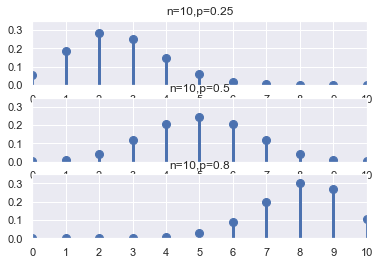

In [5]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

fig, ax = plt.subplots(3, 1)
params = [(10, 0.25), (10, 0.5), (10, 0.8)] # n=10 p=
x = range(0, 11)

for i in range(len(params)):
    binom_rv = binom(n=params[i][0], p=params[i][1])
    ax[i].set_title('n={},p={}'.format(params[i][0], params[i][1]))
    ax[i].plot(x, binom_rv.pmf(x), 'bo', ms=8)
    ax[i].vlines(x, 0, binom_rv.pmf(x), colors='b', lw=3)
    ax[i].set_xlim(0, 10)
    ax[i].set_ylim(0, 0.35)
    ax[i].set_xticks(x)
    ax[i].set_yticks([0, 0.1, 0.2, 0.3])
    
plt.show()

随机变量的采样——用rvs方法，指定重复采样10万次

rvs0:[2 3 5 ... 1 0 4]
rvs1:[6 7 4 ... 6 4 3]
rvs2:[ 7 10  9 ... 10  8  7]


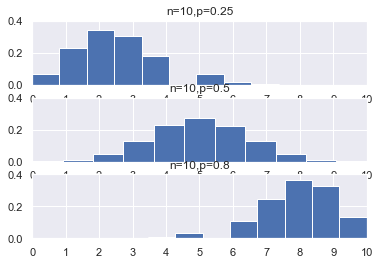

In [10]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

fig, ax = plt.subplots(3, 1)
params = [(10, 0.25), (10, 0.5), (10, 0.8)]
x = range(0, 11)
for i in range(len(params)):
    binom_rv = binom(n=params[i][0], p=params[i][1])
    rvs = binom_rv.rvs(size=100000)
    ax[i].hist(rvs, bins=11, density=True, stacked=True)
    ax[i].set_title('n={},p={}'.format(params[i][0], params[i][1]))
    ax[i].set_xlim(0, 10)
    ax[i].set_ylim(0, 0.4)
    ax[i].set_xticks(x)
    print('rvs{}:{}'.format(i, rvs))

plt.show()

二项分布的期待和方差

In [11]:
import numpy as np
from scipy.stats import binom

binom_rv = binom(n=10, p=0.25)
mean, var, skew, kurt = binom_rv.stats(moments='mvsk')

binom_rvs = binom_rv.rvs(size=100000)
E_sim = np.mean(binom_rvs)
S_sim = np.std(binom_rvs)
V_sim = S_sim * S_sim

print('mean={},var={}'.format(mean,var))
print('E_sim={},V_sim={}'.format(E_sim,V_sim))
print('E=np={},V=np(1-p)={}'.format(10 * 0.25,10 * 0.25 * 0.75))


mean=2.5,var=1.875
E_sim=2.4973,V_sim=1.8625127099999998
E=np=2.5,V=np(1-p)=1.875
